In [1]:
pip install minisom

  Using cached MiniSom-2.3.1.tar.gz (10 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10601 sha256=1294a40de0ce59a1ac41bf1646fd2381081ef092f18de90fb60832edd38b76e0
  Stored in directory: c:\users\kifka.co\appdata\local\pip\cache\wheels\28\e3\3d\707f393fa9013d5ab7b3ffb914ded8ca3c40dec231fa392528
Successfully built minisom
Note: you may need to restart the kernel to use updated packages.


In [4]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

In [6]:
# Normalisasi data
data = data / data.max(axis=0)

In [7]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

In [8]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

In [9]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

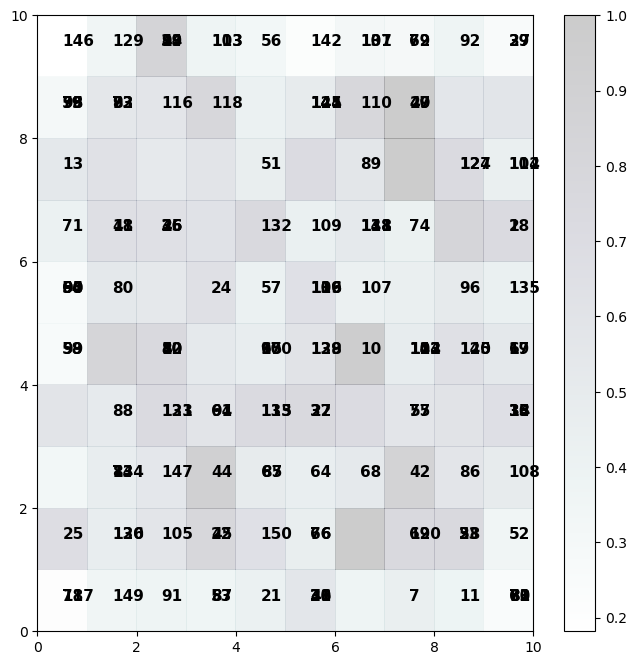

In [10]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()